KeyboardInterrupt: 

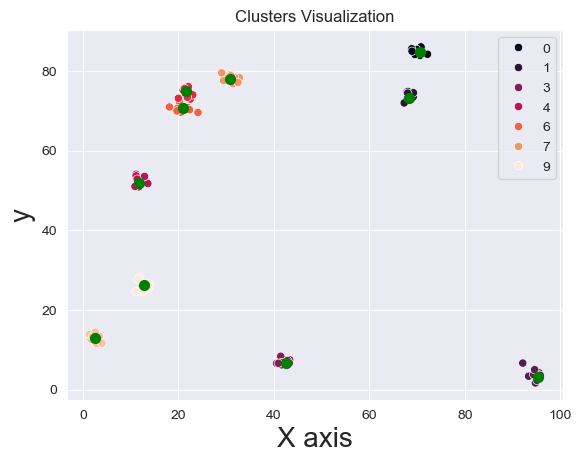

In [6]:

from mysrc.WishartClusterizationAlgorithm import Wishart
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
# import matplotlib as plt
import seaborn as sns

X, y, centers = make_blobs(n_samples=100, centers=10, n_features=2, center_box=(2, 100), shuffle=True,
                           return_centers=True, random_state=666)
X = pd.DataFrame(data=X, columns=["x", "y"])
print(X.head())
# plt.figure(figsize=(10,6))

plt.rc('axes', labelsize=20)
sns.scatterplot(data=X, x='x', y='y', hue=y, palette='rocket')
plt.scatter(centers[:, 0], centers[:, 1], s=50, c='g', marker='o')
plt.title('Clusters Visualization')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

[ 6  2 12  6  6 10 11  6 10  2  8  3 11 10  9  8 12 11  9  8  1  2 12  6
  2  4  2 11 12  4  9  1  3  2  6  3  8  6  1 11  8  6  3  6  3  2  6  9
  9 11  9  8  4 10  1 10 11 12  9  9  1 12 10  3  9  3  9  4 12 12  4  2
  1  9 11  4 10 10  3  8  1  8 12  1  4  4  4  3 10  1 10  3  8  1  2  4
  2  8 11 12]
defaultdict(<class 'list'>, {6: array([31.07096954, 78.21230329]), 2: array([42.04108967,  6.87716046]), 12: array([ 2.56336379, 12.87195602]), 10: array([11.94617012, 52.36626595]), 11: array([20.84196456, 70.31565658]), 8: array([70.28291134, 84.87786428]), 3: array([12.76441644, 26.20476965]), 9: array([21.66188588, 74.15968319]), 1: array([94.6336548 ,  3.81610376]), 4: array([68.24326889, 73.6705437 ])})


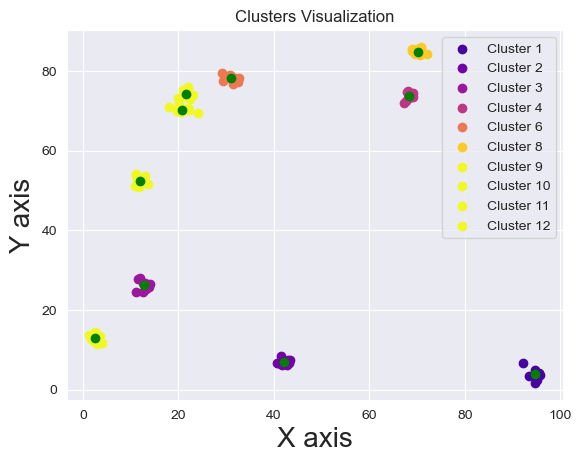

In [5]:

wishart = Wishart(k=4, mu=0.2)
x_list = X.values.tolist()
# print(x_list)
wishart.fit(x_list)
print(wishart.labels_)
clusters = wishart.labels_
cluster_centers = wishart.clusters_centers_
print(cluster_centers)
from matplotlib import colormaps

unique_clusters = set(clusters)
colors = plt.get_cmap('plasma', len(unique_clusters))
for cluster in unique_clusters:
    cluster_points = X[clusters == cluster]
    plt.scatter(cluster_points['x'], cluster_points['y'],
                color=colors(cluster), label=f'Cluster {cluster}')
    plt.scatter(cluster_centers[cluster][0], cluster_centers[cluster][1], color='green')
plt.title('Clusters Visualization')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()